In [2]:
import matplotlib.pyplot as plt
import numpy as np

1. 단변량 회귀분석

In [26]:
time =[1,2,3,4,5,6,7,8,9]
score = [11,22,33,44,54,66,77,87,96]

1.1 x,y 평균 구하기

In [27]:
x_bar = sum(time) / len(time)
y_bar = sum(score) / len(score)
x_bar, y_bar

(5.0, 54.44444444444444)

1.2. 최소제곱법 a, b

In [28]:
a = sum([(y - y_bar) * (x - x_bar) for y, x in list(zip(score, time))])
a /= sum([(x - x_bar) **2 for x in time])
b = y_bar - a * x_bar
print('a:', a, 'b:', b)

a: 10.75 b: 0.6944444444444429


1.3 회귀선 그리기

In [25]:
line_x = np.arange(min(time), max(time), 1)
line_y = a * line_x + b

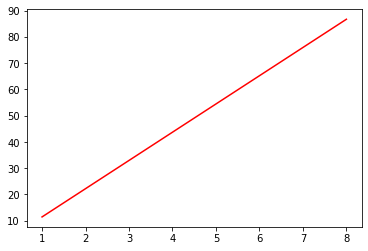

In [26]:
plt.plot(line_x, line_y, 'r-')

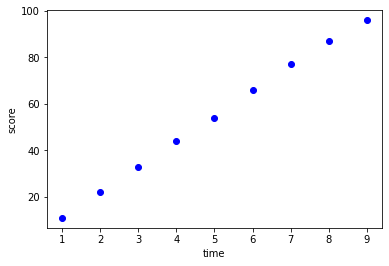

In [4]:
plt.plot(time, score, 'bo')
plt.xlabel('time')
plt.ylabel('score')
plt.show()

2. 다변량 회귀분석


In [24]:
quiz1 = [75, 91, 87, 93, 74]
quiz2 = [83, 89, 93, 97, 66]
quiz3 = [74, 97, 92, 100, 86]
final = [87, 95, 96, 92, 87]

2.1. 각 변수 평균 구하기

In [25]:
quiz1_bar = sum(quiz1) / len(quiz1)
quiz2_bar = sum(quiz2) / len(quiz2)
quiz3_bar = sum(quiz3) / len(quiz3)
final_bar = sum(final) / len(final)
quiz1_bar, quiz2_bar, quiz3_bar, final_bar

(84.0, 85.6, 89.8, 91.4)

2.2. 각 변수의 최소 제곱법 적용

In [49]:
a = sum([(y - final_bar) * (x - quiz1_bar) for y, x in list(zip(final, quiz1))])
a /= sum([(x - x_bar) **2 for x in quiz1])
b = final_bar - a * x_bar
print('a:', a, 'b:', b)

a: 0.004060269627279936 b: 91.3796986518636


In [50]:
c = sum([(y - final_bar) * (x - quiz1_bar) for y, x in list(zip(final, quiz2))])
c /= sum([(x - x_bar) **2 for x in quiz2])
d = final_bar - c * x_bar
print('c:', c, 'd:', d)

c: 0.004560162085336719 d: 91.37719918957332


In [51]:
e = sum([(y - final_bar) * (x - quiz1_bar) for y, x in list(zip(final, quiz3))])
e /= sum([(x - x_bar) **2 for x in quiz3])
f = final_bar - e * x_bar
print('e:', e, 'f:', f)

e: 0.0035294117647058777 f: 91.38235294117648


In [52]:
line_x = np.arange(min(map(min, ([quiz1, quiz2, quiz3]))),max(map(max, ([quiz1, quiz2, quiz3]))), 1)
line_y = a * line_x + c * line_x+ e * line_x + b

2.3. 회귀선 구하기

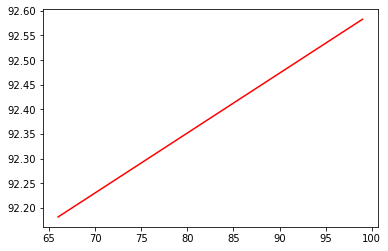

In [53]:
plt.plot(line_x, line_y, 'r-')

3. 텐서플로우 회귀분석


In [8]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import random

In [9]:
time =[1,2,3,4,5,6,7,8,9]
score = [11,22,33,44,54,66,77,87,96]

In [10]:
a = tf.Variable(random.random())
b = tf.Variable(random.random())

In [20]:
def compute_loss():
  score_pred = a * time + b
  loss = tf.reduce_mean((score - score_pred)**2)
  return loss

In [21]:
optimizer = tf.optimizers.Adam(lr = 0.07)
for i in range(1000):
  optimizer.minimize(compute_loss, var_list =[a,b])
  if i % 100 == 99:
    print(i, 'a:', a.numpy(), 'b:', b.numpy(), 'loss:', compute_loss().numpy())

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


99 a: 103.87927 b: 104.42025 loss: 382005.56
199 a: 97.19918 b: 97.73911 loss: 329972.12
299 a: 90.76368 b: 91.30163 loss: 283444.28
399 a: 84.57414 b: 85.10913 loss: 242028.22
499 a: 78.632286 b: 79.163246 loss: 205344.44
599 a: 72.94014 b: 73.46588 loss: 173027.27
699 a: 67.49998 b: 68.0192 loss: 144724.31
799 a: 62.314217 b: 62.82548 loss: 120095.66
899 a: 57.385372 b: 57.887142 loss: 98814.02
999 a: 52.7159 b: 53.206455 loss: 80564.48


In [22]:
line_x = np.arange(min(time), max(time))
line_y = a * line_x +b

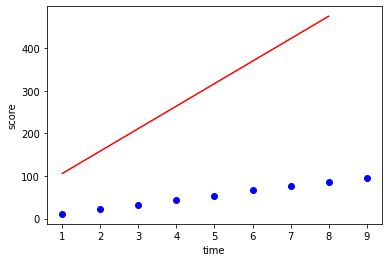

In [23]:
plt.plot(line_x, line_y, 'r-')
plt.plot(time, score, 'bo')
plt.xlabel('time')
plt.ylabel('score')
plt.show()

3. 케라스 회귀분석


In [54]:
import tensorflow as tf
import numpy as np

In [55]:
time =[1,2,3,4,5,6,7,8,9]
score = [11,22,33,44,54,66,77,87,96]

In [57]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=6, activation ='tanh', input_shape=(1,)),
    tf.keras.layers.Dense(units=1)
])

model.compile(optimizer = tf.keras.optimizers.SGD(lr = 0.1), loss ='mse')

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 6)                 12        
                                                                 
 dense_1 (Dense)             (None, 1)                 7         
                                                                 
Total params: 19
Trainable params: 19
Non-trainable params: 0
_________________________________________________________________


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [58]:
model.fit(time, score, epochs = 10)

Epoch 1/10
1/1 [==============================] - 1s 900ms/step - loss: 3653.9185
Epoch 2/10
1/1 [==============================] - 0s 22ms/step - loss: 1366.7297
Epoch 3/10
1/1 [==============================] - 0s 31ms/step - loss: 475.1302
Epoch 4/10
1/1 [==============================] - 0s 18ms/step - loss: 1312.7129
Epoch 5/10
1/1 [==============================] - 0s 28ms/step - loss: 857.6014
Epoch 6/10
1/1 [==============================] - 0s 22ms/step - loss: 784.7836
Epoch 7/10
1/1 [==============================] - 0s 41ms/step - loss: 773.1328
Epoch 8/10
1/1 [==============================] - 0s 18ms/step - loss: 771.2686
Epoch 9/10
1/1 [==============================] - 0s 42ms/step - loss: 770.9704
Epoch 10/10
1/1 [==============================] - 0s 38ms/step - loss: 770.9226


In [59]:
model.predict(time)

array([[54.48258],
       [54.48258],
       [54.48258],
       [54.48258],
       [54.48258],
       [54.48258],
       [54.48258],
       [54.48258],
       [54.48258]], dtype=float32)